In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('./dataset/pima-indians-diabetes.csv', 
names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])

In [6]:
df.head(5)

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [13]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
print(df[['pregnant','class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

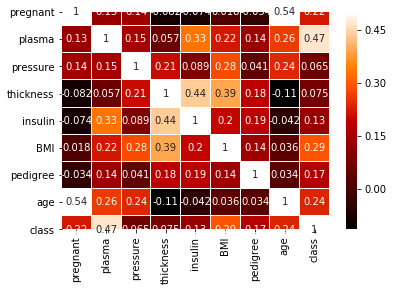

In [32]:
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()

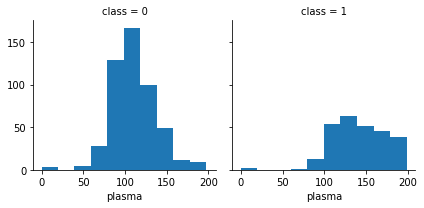

In [33]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [51]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [58]:
data = np.loadtxt('./dataset/pima-indians-diabetes.csv', delimiter=',')
X = data[: ,0:8]
Y = data[:, 8]

In [59]:
tf.random.set_seed(10)
np.random.seed(10)

In [60]:
model = Sequential()
model.add(Dense(12, input_dim = 8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [61]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
model.fit(X, Y, epochs=200, batch_size=10)

Train on 768 samples
Epoch 1/200
768/768 [==============================] - 2s 3ms/sample - loss: 1.4828 - accuracy: 0.5560
Epoch 2/200
768/768 [==============================] - 0s 316us/sample - loss: 0.9247 - accuracy: 0.5547
Epoch 3/200
768/768 [==============================] - 0s 266us/sample - loss: 0.7967 - accuracy: 0.5599
Epoch 4/200
768/768 [==============================] - 0s 279us/sample - loss: 0.7387 - accuracy: 0.5781
Epoch 5/200
768/768 [==============================] - 0s 297us/sample - loss: 0.6967 - accuracy: 0.6042
Epoch 6/200
768/768 [==============================] - 0s 297us/sample - loss: 0.6744 - accuracy: 0.6393
Epoch 7/200
768/768 [==============================] - 0s 326us/sample - loss: 0.6628 - accuracy: 0.6393
Epoch 8/200
768/768 [==============================] - 0s 350us/sample - loss: 0.6507 - accuracy: 0.6419
Epoch 9/200
768/768 [==============================] - 0s 301us/sample - loss: 0.6394 - accuracy: 0.6615
Epoch 10/200
768/768 [==============

768/768 [==============================] - 0s 425us/sample - loss: 0.5435 - accuracy: 0.7305
Epoch 79/200
768/768 [==============================] - 0s 400us/sample - loss: 0.5479 - accuracy: 0.7240
Epoch 80/200
768/768 [==============================] - 0s 296us/sample - loss: 0.5401 - accuracy: 0.7357
Epoch 81/200
768/768 [==============================] - 0s 258us/sample - loss: 0.5434 - accuracy: 0.7266
Epoch 82/200
768/768 [==============================] - 0s 258us/sample - loss: 0.5538 - accuracy: 0.7266
Epoch 83/200
768/768 [==============================] - 0s 277us/sample - loss: 0.5450 - accuracy: 0.7266
Epoch 84/200
768/768 [==============================] - 0s 303us/sample - loss: 0.5344 - accuracy: 0.7370
Epoch 85/200
768/768 [==============================] - 0s 300us/sample - loss: 0.5421 - accuracy: 0.7253
Epoch 86/200
768/768 [==============================] - 0s 303us/sample - loss: 0.5410 - accuracy: 0.7357
Epoch 87/200
768/768 [==============================] - 0s 

768/768 [==============================] - 0s 407us/sample - loss: 0.5138 - accuracy: 0.7461
Epoch 155/200
768/768 [==============================] - 0s 387us/sample - loss: 0.5118 - accuracy: 0.7487
Epoch 156/200
768/768 [==============================] - 0s 370us/sample - loss: 0.5078 - accuracy: 0.7578
Epoch 157/200
768/768 [==============================] - 0s 413us/sample - loss: 0.5104 - accuracy: 0.7604
Epoch 158/200
768/768 [==============================] - 0s 303us/sample - loss: 0.5055 - accuracy: 0.7617
Epoch 159/200
768/768 [==============================] - 0s 285us/sample - loss: 0.5062 - accuracy: 0.7500
Epoch 160/200
768/768 [==============================] - 0s 308us/sample - loss: 0.5035 - accuracy: 0.7643
Epoch 161/200
768/768 [==============================] - 0s 362us/sample - loss: 0.5084 - accuracy: 0.7630
Epoch 162/200
768/768 [==============================] - 0s 365us/sample - loss: 0.5057 - accuracy: 0.7552
Epoch 163/200
768/768 [============================

In [63]:
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

768/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


 Accuracy: 0.7708
